# Exercise II Wrangle

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import acquire
import prepare
import explore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
from env import user, password, host


#import ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Aquire

In [2]:
# Create a function that retrieves the necessary connection URL.

# Acquire
from env import host, user, password

# Create a function that retrieves the necessary connection URL.

def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

# Create function to retrieve zillow data

def get_zillow_data():
    '''
    This function reads in the Zillow data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    
    filename = 'zillow.csv'

    if os.path.isfile(filename):
        return pd.read_csv(filename)

    else:
        
        sql = '''
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips 
                FROM  properties_2017
                WHERE propertylandusetypeid = 261
                '''
        df.to_csv(filename, index=False)

        df = pd.read_sql(sql, get_connection('zillow'))
        
  
   
        return df

In [3]:
df = get_zillow_data()

In [4]:
# Drop Unnamed: 0 column

df = df.drop(columns = 'Unnamed: 0')

## Sample and Summarize


In [5]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
# 2152863 rows and 7 columns
df.shape

(2152863, 7)

In [7]:
# Display readable summary statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
# Running .info() shows us that the columns are floats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


## Acquire and Summarize Takeaways


## Prepare the Data
### Finding Null Values

In [9]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()


bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [10]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()


bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [11]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]


Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

## Finding Odd Values


In [12]:
# Check out the values and their frequencies from columns.

df.bedroomcnt.value_counts(dropna=False, ascending=True)

25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedroomcnt, dtype: int64

In [13]:
# Check out the values and their frequencies from columns.

df.bathroomcnt.value_counts(dropna=False, ascending=True)

19.00         1
32.00         1
19.50         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathroomcnt, dtype: int64

In [14]:
# Check out the values and their frequencies from columns.

df.calculatedfinishedsquarefeet.value_counts(dropna=False, ascending=True)

24920.0       1
10127.0       1
35046.0       1
8803.0        1
16134.0       1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8484
Name: calculatedfinishedsquarefeet, Length: 10581, dtype: int64

In [15]:
# Check out the values and their frequencies from columns.

df.taxvaluedollarcnt.value_counts(dropna=False, ascending=True)

27516.0        1
167020.0       1
145983.0       1
81898.0        1
1503486.0      1
            ... 
440000.0     685
430000.0     690
400000.0     729
500000.0     779
450000.0     821
Name: taxvaluedollarcnt, Length: 592270, dtype: int64

In [16]:
# Check out the values and their frequencies from columns.

df.yearbuilt .value_counts(dropna=False, ascending=True)

1874.0        1
1877.0        1
1862.0        1
1840.0        1
1807.0        1
1823.0        1
1855.0        1
1879.0        1
1833.0        1
1865.0        2
1876.0        2
1812.0        2
1878.0        2
1870.0        3
1801.0        3
1881.0        4
1882.0        6
1883.0        8
1875.0       10
1884.0       14
1889.0       30
1891.0       31
1886.0       33
1880.0       39
1892.0       65
1887.0       78
1888.0       88
1893.0       91
2016.0       98
1894.0      103
1896.0      128
1897.0      135
1899.0      139
1885.0      172
1898.0      256
1890.0      539
1895.0      569
1900.0      677
1902.0      682
1904.0     1038
1903.0     1154
1901.0     1238
1917.0     1583
1918.0     1792
1916.0     2129
1906.0     2176
1934.0     2399
1907.0     2486
1933.0     2725
2011.0     2753
2010.0     2787
1909.0     2847
1919.0     2858
1915.0     2879
1905.0     2890
2009.0     3063
1908.0     3133
1914.0     3268
2012.0     3438
2015.0     3556
1932.0     3611
1913.0     3997
1911.0  

In [17]:
# Check out the values and their frequencies from columns.

df.taxamount.value_counts(dropna=False, ascending=True)

3425.69       1
5555.02       1
4921.21       1
871.75        1
3475.45       1
           ... 
285.30       67
343.52       75
344.18       77
345.72      172
NaN        4442
Name: taxamount, Length: 918839, dtype: int64

In [18]:
# Check out the values and their frequencies from columns.

df.fips.value_counts(dropna=False, ascending=True)


6111.0     165975
6059.0     555077
6037.0    1431811
Name: fips, dtype: int64

In [19]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)


### Verify that our empty string has been replaced by a null



In [20]:
# Now .info() shows us that exam3 has a Null value instead of a whitespace disguised as a non-null value.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


## Drop Null Values


In [21]:
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [22]:
 # Confirming no Nulls
    
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

## Convert Data Types


In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


## Visualize Distributions


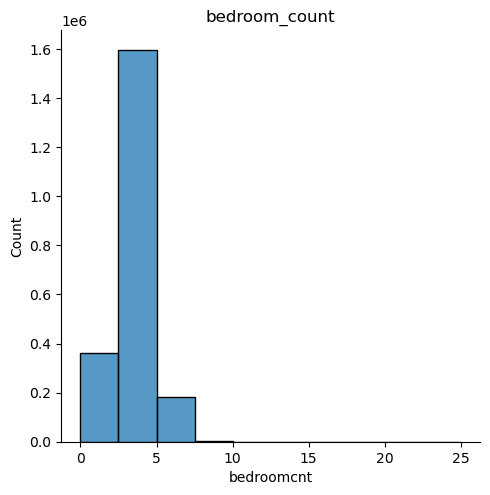

In [24]:
# The default is bins=10.

sns.displot(x='bedroomcnt', data=df, bins =10)

plt.title('bedroom_count')
plt.show()

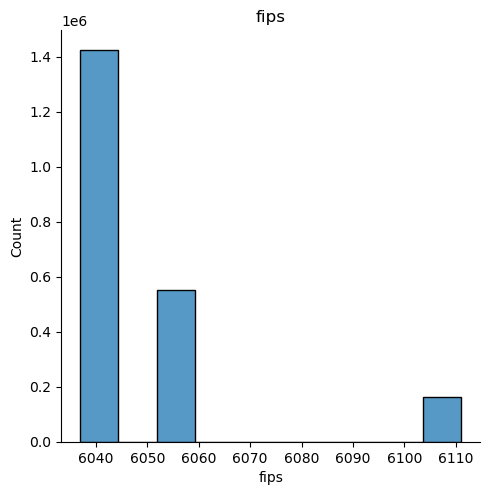

In [25]:
# The default is bins=10.

sns.displot(x='fips', data=df, bins= 10)

plt.title('fips')
plt.show()


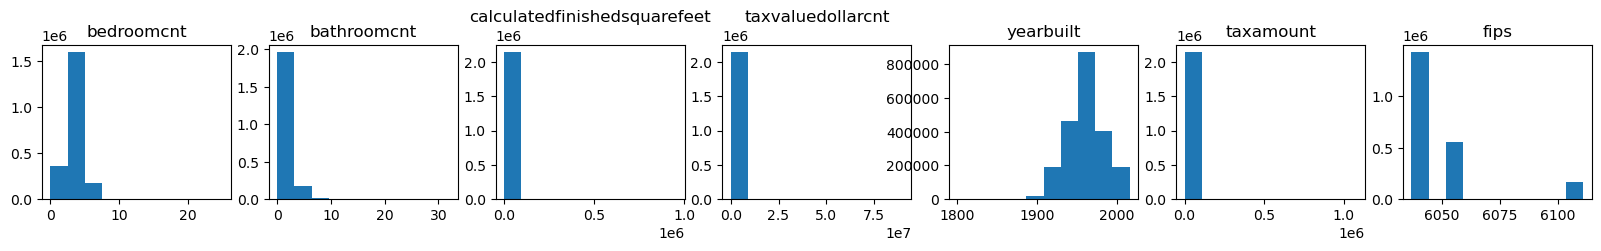

In [26]:
# Here we'll loop through each of the numeric columns of interest and show the distribution of each on a separate subplot.

plt.figure(figsize=(20, 2))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

   
    # Display histogram for column.
    df[col].hist(bins= 10)

    # Hide gridlines.
    plt.grid(False)
    
    
    
    


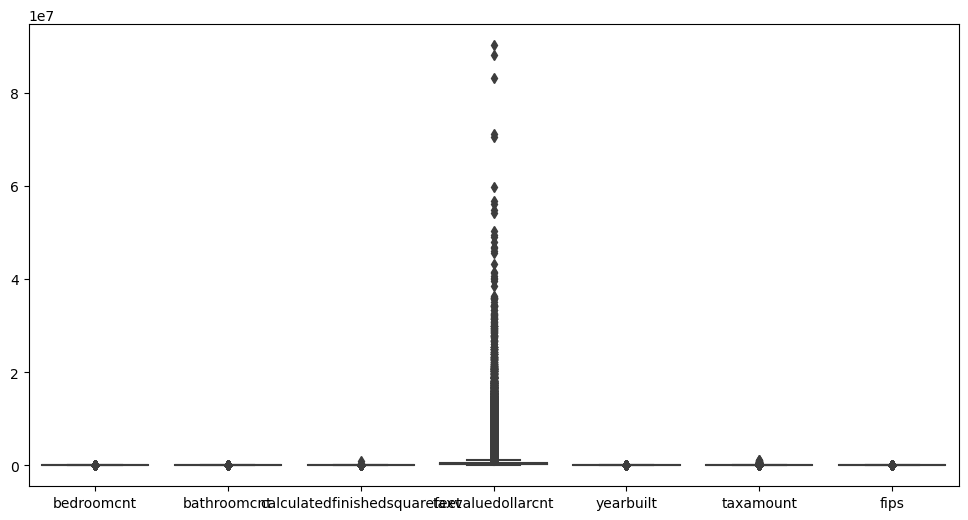

In [27]:
# Seaborn's .boxplot will default to plotting all the numeric variables if we don't specify specific x and y values.




plt.figure(figsize=(12,6))

# Create boxplots for all 
sns.boxplot(data=df)
plt.show()




### Distribution Takeaways


* Only year built is distributed evenly/ normal distro 

## Pipeline Function


In [28]:
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    
def get_zillow_data():
    filename = "zillow.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col=0)
    else:
    
      # Create the engine
        engine = create_engine(get_connection('zillow_sample'))

        
        # Read the SQL query into a dataframe
        df = pd.read_sql(text('SELECT * FROM properties_2017') ,engine_connect()) 

        
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df

    
def wrangle_zillow():
    '''
    Read zillow data into a pandas DataFrame from mySQL,
    drop columns not needed for analysis, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned zillow DataFrame.
    '''

    # Acquire data

    zillow = get_zillow_data()

    # Replace white space values with NaN values.
    zillow = zillow.replace(r'^\s*$', np.nan, regex=True)

    # Drop any rows with NaN values.
    df = zillow.dropna()

    # Drop Unnamed: 0 column
    df = df.drop(columns = 'Unnamed: 0')

    return df

In [1]:
# Let's test out or wrangle function from above.

df = wrangle_zillow()

NameError: name 'wrangle_zillow' is not defined

In [ ]:
df.info()
